In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
file_path ='/kaggle/input/car-dealership-sales-dataset/dataset_5_Car Dealership Sales.csv'  # Adjust file path to your uploaded file
data = pd.read_csv(file_path)

print(data.head())



         Date Product Region Customer_Type  Quantity     Price  Discount  \
0  2024-11-22   Truck  South    Individual         1  52423.43      0.27   
1  2024-04-05   Sedan  South     Corporate         3  58856.04      0.27   
2  2024-09-01   Coupe   West    Individual         4  47876.41      0.04   
3  2024-11-10   Coupe   West     Corporate         4  26696.72      0.25   
4  2024-06-02     SUV   East    Individual         1  37927.63      0.21   

     Revenue  
0   38269.10  
1  128894.73  
2  183845.41  
3   80090.16  
4   29962.83  


In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
None


In [47]:
print(data.describe())

          Quantity         Price    Discount        Revenue
count  1000.000000   1000.000000  1000.00000    1000.000000
mean      3.039000  37888.246370     0.14739   97276.729880
std       1.444841  13177.092129     0.08719   59716.693922
min       1.000000  15070.540000     0.00000   10564.570000
25%       2.000000  25928.272500     0.07000   48605.562500
50%       3.000000  38046.470000     0.14000   83955.695000
75%       4.000000  49980.355000     0.22000  133005.602500
max       5.000000  59968.400000     0.30000  298748.100000


In [48]:
missing_values = data.isnull().sum()
print(missing_values)
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [53]:
duplicates = data.duplicated().sum()
print(duplicates)
data.drop_duplicates(inplace=True)


0


In [58]:
total_revenue = data ['Price'].sum()
print(f'Total Revenue: TK {total_revenue}')

Total Revenue: TK 37888246.370000005


In [72]:
average_price_per_service = data.groupby('Customer_Type') ['Price'].mean()
print(average_price_per_service)

Customer_Type
Corporate     38356.207525
Individual    37425.867256
Name: Price, dtype: float64


In [78]:
total_services_by_product = data['Product'].value_counts()
print(total_services_by_product)

Product
Sedan    274
SUV      267
Coupe    230
Truck    229
Name: count, dtype: int64


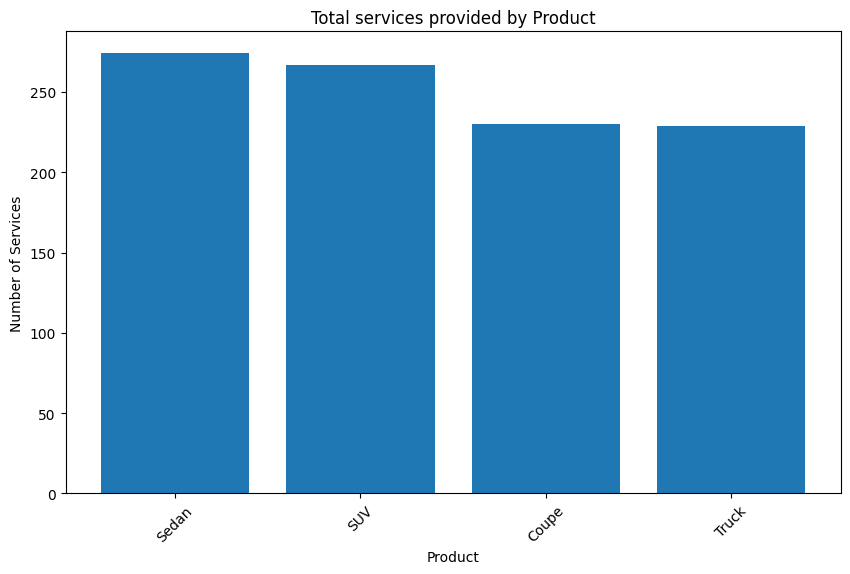

In [79]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_product.index, total_services_by_product.values)
plt.title("Total services provided by Product")
plt.xlabel('Product')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_product.png')
plt.show()

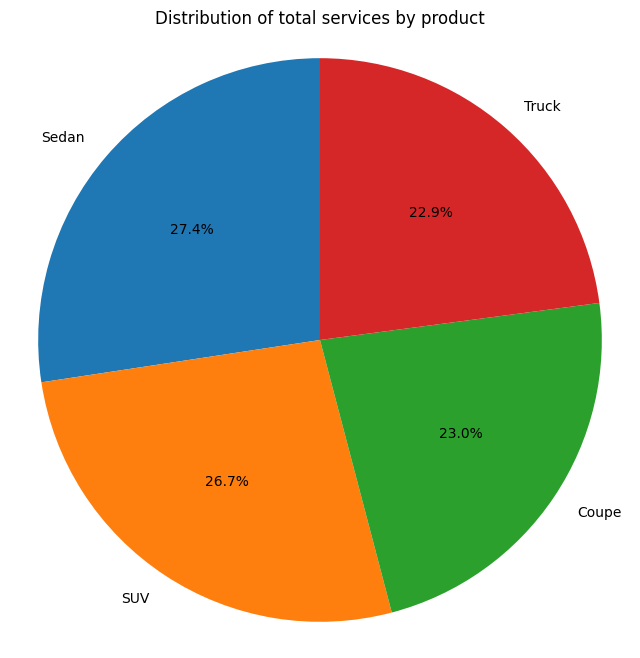

In [82]:
plt.figure(figsize=(8,8))
plt.pie(total_services_by_product, labels= total_services_by_product.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of total services by product')
plt.axis('equal')
plt.savefig('services_distribution_by_product.png')
plt.show()
